# t-distributed Stochastic Network Embedding (t-SNE)
### Dataset: [Dry_Bean_Dataset.xlsx](../../input/Dry_Bean_Dataset_Citation_Request.txt)


<a id="1"></a>
## Import modules

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



<a id="2"></a>
## Loading dataset

In [7]:
filename = '../../input/Dry_Bean_Dataset.xlsx'
df = pd.read_excel(filename, nrows=100)  

print(df)




     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   28395    610.291       208.178117       173.888747      1.197191   
1   28734    638.018       200.524796       182.734419      1.097356   
2   29380    624.110       212.826130       175.931143      1.209713   
3   30008    645.884       210.557999       182.516516      1.153638   
4   30140    620.134       201.847882       190.279279      1.060798   
..    ...        ...              ...              ...           ...   
95  33078    659.456       235.560078       178.931233      1.316484   
96  33078    652.214       221.386903       190.354812      1.163022   
97  33089    663.915       217.335822       194.207049      1.119093   
98  33090    653.809       228.406675       184.688555      1.236713   
99  33143    648.385       222.526310       189.737379      1.172812   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0       0.549812       28715     190.141097  0.763923  0.

<a id="3"></a>
## Standardize the data

In [8]:
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity']
target = 'Class'

X = df[features].values
y = df[target].values

x = StandardScaler().fit_transform(X)

<a id="4"></a>
## t-SNE Projection to 2D

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.291s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 1.098846
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.126324
[t-SNE] KL divergence after 900 iterations: 0.164482
t-SNE done! Time elapsed: 1.5454306602478027 seconds
original shape:    (100, 6)
transformed shape: (100, 2)


/var/folders/v4/0f9n6lpx3pn7ghtrplsk92h80000gn/T/ipykernel_37050/58420321.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: >

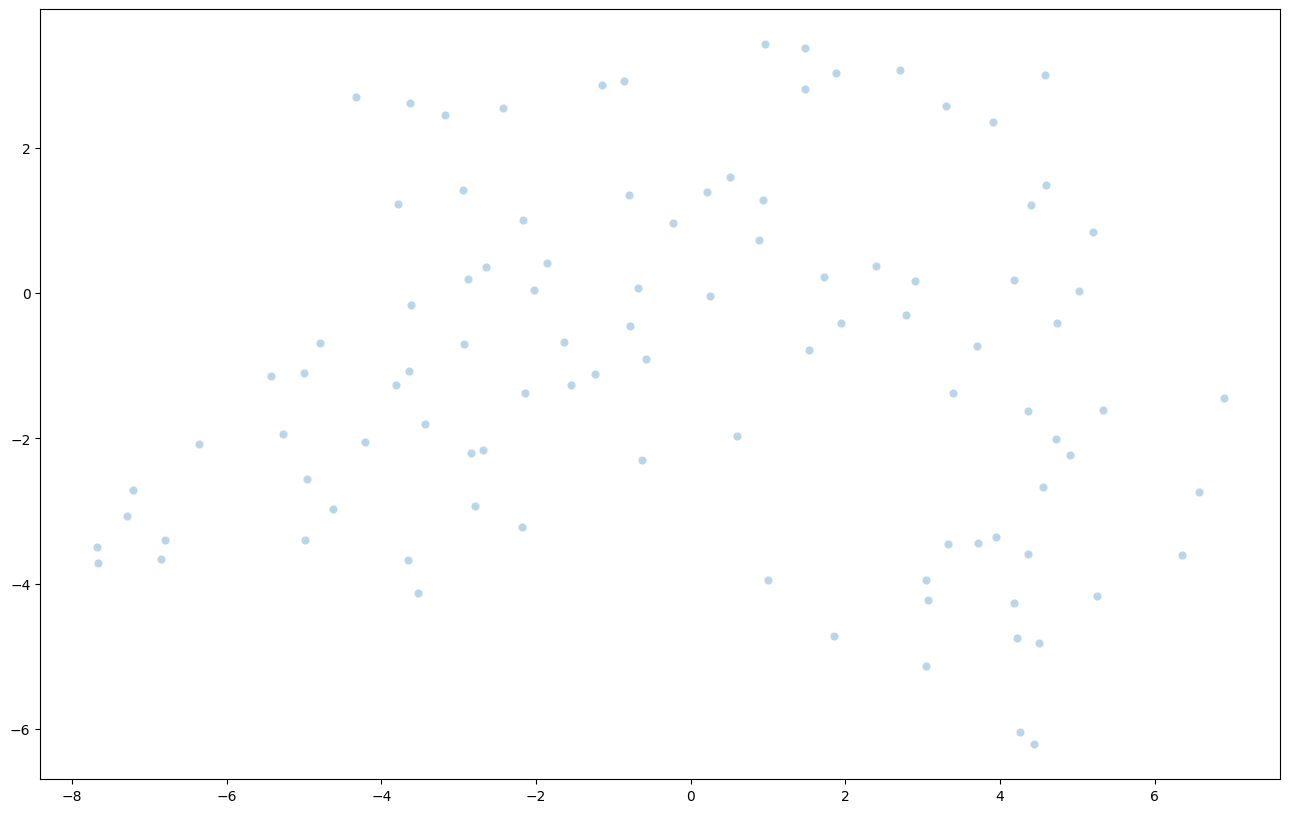

In [9]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_result = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print("original shape:   ", x.shape)
print("transformed shape:", tsne_result.shape)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_result[:,0], y=tsne_result[:,1],
    palette=sns.color_palette("hsv", 10),
    legend="full",
    alpha=0.3
)

<a id="5"></a>
## Visualize 2D Projection

/var/folders/v4/0f9n6lpx3pn7ghtrplsk92h80000gn/T/ipykernel_37050/3185144506.py:3: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.scatterplot(x='tsne_1', y='tsne_2', hue='class', data=tsne_result_df, ax=ax,s=10, palette=sns.color_palette(n_colors=6))


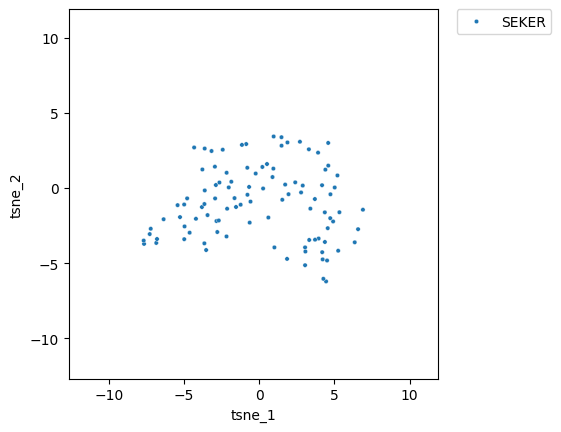

In [11]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'class': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='class', data=tsne_result_df, ax=ax,s=10, palette=sns.color_palette(n_colors=6))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()